In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy. stats import norm
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr
from statsmodels.tsa.stattools import adfuller

C:\Users\user\AppData\Local\Temp\ipykernel_8116\4190163632.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Загрузка данных котировок

Для загрузки данных будем использовать API с сайта https://www.alphavantage.co

## Поиск символов котировок акций

### Поиск символа акций компании APPLE

In [2]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=apple&apikey=IQQAZTAMCLS5AX4F&datatype=json'
r = requests.get(url)
data = r.json()
print(data)

{'bestMatches': [{'1. symbol': 'APLE', '2. name': 'Apple Hospitality REIT Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.8889'}, {'1. symbol': 'AAPL', '2. name': 'Apple Inc', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '0.7143'}, {'1. symbol': 'AAPL34.SAO', '2. name': 'Apple Inc', '3. type': 'Equity', '4. region': 'Brazil/Sao Paolo', '5. marketOpen': '10:00', '6. marketClose': '17:30', '7. timezone': 'UTC-03', '8. currency': 'BRL', '9. matchScore': '0.7143'}, {'1. symbol': 'APC.DEX', '2. name': 'Apple Inc', '3. type': 'Equity', '4. region': 'XETRA', '5. marketOpen': '08:00', '6. marketClose': '20:00', '7. timezone': 'UTC+02', '8. currency': 'EUR', '9. matchScore': '0.7143'}, {'1. symbol': 'APC.FRK', '2. name': 'Apple Inc', '3. type': 'E

In [3]:
df = pd.DataFrame(data['bestMatches'])
display(df)

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,APLE,Apple Hospitality REIT Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8889
1,AAPL,Apple Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.7143
2,AAPL34.SAO,Apple Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7143
3,APC.DEX,Apple Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.7143
4,APC.FRK,Apple Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.7143
5,AGPL,Apple Green Holding Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.6667
6,0R2V.LON,Apple Inc.,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.6667
7,APRU,Apple Rush Company Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.4444
8,500014.BSE,Apple Finance Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3846
9,603020.SHH,Apple Flavor Fragrance Group Company Ltd,Equity,Shanghai,09:30,15:00,UTC+08,CNY,0.2222


Символ для компании Apple <b>AAPL</b>

### Поиск символа акций компании Facebook

Социальной сетью Facebook владеет компания <b>META</b>, поэтому будем использовать котировки акций этой компании

In [4]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=meta&apikey=IQQAZTAMCLS5AX4F&datatype=json'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data['bestMatches'])
display(df)

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,META,Meta Platforms Inc - Class A,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
1,META.LON,WisdomTree Industrial Metals Enhanced,ETF,United Kingdom,08:00,16:30,UTC+01,USD,0.8000
2,METEX.PAR,Metabolic Explorer SA,Equity,Paris,09:00,17:30,UTC+02,EUR,0.6667
3,METALCO.BSE,METAL COATINGS (INDIA) LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5714
4,MTCR,Metacrine Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.5000
5,ALMTA.PAR,Metadvertise S.A.,Equity,Paris,09:00,17:30,UTC+02,EUR,0.5000
6,METALFORGE.BSE,Metalyst Forgings Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4706
7,AIU,Meta Data Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.4706
8,7ME.FRK,METabolic EXplorer S.A,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.4444
9,FM7.FRK,Meta Financial Group Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.2857


символ для компании META <b>META</b>

### Поиск символа акций компании Google

Сервисом Google владеет компания <b>Alphabet</b>, будем использовать котировки акций этой компании

In [5]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=alphabet&apikey=IQQAZTAMCLS5AX4F&datatype=json'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data['bestMatches'])
display(df)

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,ABEC.DEX,Alphabet Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.8000
1,ABEC.FRK,Alphabet Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.8000
2,GOGL34.SAO,Alphabet Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.8000
3,GOGL35.SAO,Alphabet Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.8000
4,0RIH.LON,Alphabet Inc Class A,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.5714
5,ABEA.DEX,Alphabet Inc Class A,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.5714
6,ABEA.FRK,Alphabet Inc Class A,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.5714
7,GOOGL,Alphabet Inc - Class A,Equity,United States,09:30,16:00,UTC-04,USD,0.5333
8,GOOG,Alphabet Inc - Class C,Equity,United States,09:30,16:00,UTC-04,USD,0.5333


Символ для Google <b>GOOGL</b>

## Загрузим данные компании Apple

In [6]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=IQQAZTAMCLS5AX4F&outputsize=full'
r = requests.get(url)
data = r.json()
df_apple = pd.DataFrame(data['Time Series (Daily)'])
df_apple = df_apple.T[['4. close']]
df_apple.index = pd.to_datetime(df_apple.index)
df_apple = df_apple[df_apple.index > '2012-12-02']
df_apple.columns = ['apple']
display(df_apple)

,apple
2022-12-20,132.3
2022-12-19,132.37
2022-12-16,134.51
2022-12-15,136.5
2022-12-14,143.21
...,...
2012-12-07,533.25
2012-12-06,547.2445
2012-12-05,538.7923
2012-12-04,575.8454


In [7]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2531 entries, 2022-12-20 to 2012-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   apple   2531 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


Данные имеют тип object, преобразуем их в тип float

In [8]:
df_apple.apple = df_apple.apple.apply(pd.to_numeric, downcast='float', errors='coerce')

Посмторим на статистики данных

In [9]:
df_apple.describe()

,apple
count,2531.000000
mean,212.466415
std,135.895844
min,90.279999
25%,122.390003
50%,156.000000
75%,222.205002
max,647.349976


## Загрузим данные компании Google

In [10]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GOOGL&apikey=IQQAZTAMCLS5AX4F&outputsize=full'
r = requests.get(url)
data = r.json()
df_google = pd.DataFrame(data['Time Series (Daily)'])
df_google = df_google.T[['4. close']]
df_google.index = pd.to_datetime(df_google.index)
df_google = df_google[df_google.index > '2012-12-02']
df_google.columns = ['google']
display(df_google)

,google
2022-12-20,89.02
2022-12-19,88.44
2022-12-16,90.26
2022-12-15,90.86
2022-12-14,95.07
...,...
2012-12-07,684.21
2012-12-06,691.13
2012-12-05,687.82
2012-12-04,691.03


In [11]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2531 entries, 2022-12-20 to 2012-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   google  2531 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [12]:
df_google.google = df_google.google.apply(pd.to_numeric, downcast='float', errors='coerce')

In [13]:
df_google.describe()

,google
count,2531.000000
mean,1158.382080
std,662.953125
min,83.430000
25%,742.190002
50%,1026.109985
75%,1299.210022
max,2996.770020


## Загрузим данные компании Facebook

In [15]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=META&apikey=IQQAZTAMCLS5AX4F&outputsize=full'
r = requests.get(url)
data = r.json()
df_facebook = pd.DataFrame(data['Time Series (Daily)'])
df_facebook = df_facebook.T[['4. close']]
df_facebook.index = pd.to_datetime(df_facebook.index)
df_facebook = df_facebook[df_facebook.index > '2012-12-02']
df_facebook.columns = ['facebook']
display(df_facebook)

,facebook
2022-12-20,117.09
2022-12-19,114.48
2022-12-16,119.43
2022-12-15,116.15
2022-12-14,121.59
...,...
2012-12-07,27.485
2012-12-06,26.97
2012-12-05,27.71
2012-12-04,27.46


In [17]:
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2531 entries, 2022-12-20 to 2012-12-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   facebook  2531 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [18]:
df_facebook.facebook = df_facebook.facebook.apply(pd.to_numeric, downcast='float', errors='coerce')

In [19]:
df_facebook.describe()

,facebook
count,2531.000000
mean,154.670898
std,84.434021
min,22.899000
25%,83.010002
50%,150.639999
75%,194.239998
max,382.179993


Посмотрим на графики акций всех трех компаний

График акций компании Apple

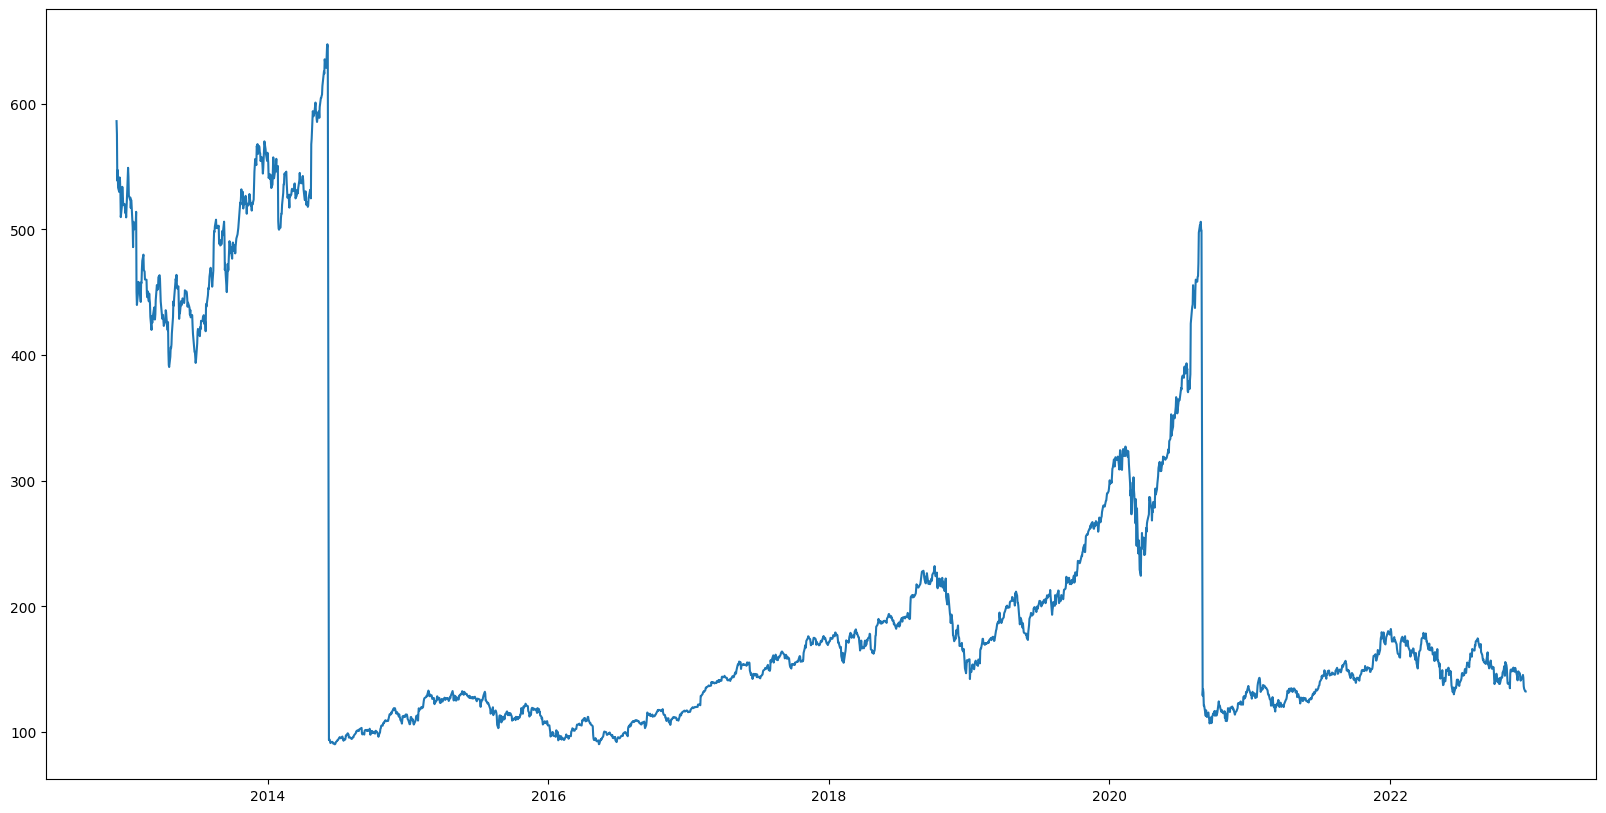

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(df_apple);

На графике видно два сплита акций компании, уберем их.

In [21]:
for i in range(len(df_apple)):
    if df_apple.index[i] < pd.to_datetime('2014-06-09'):
        df_apple.iloc[i, 0] = df_apple.iloc[i, 0] / 7

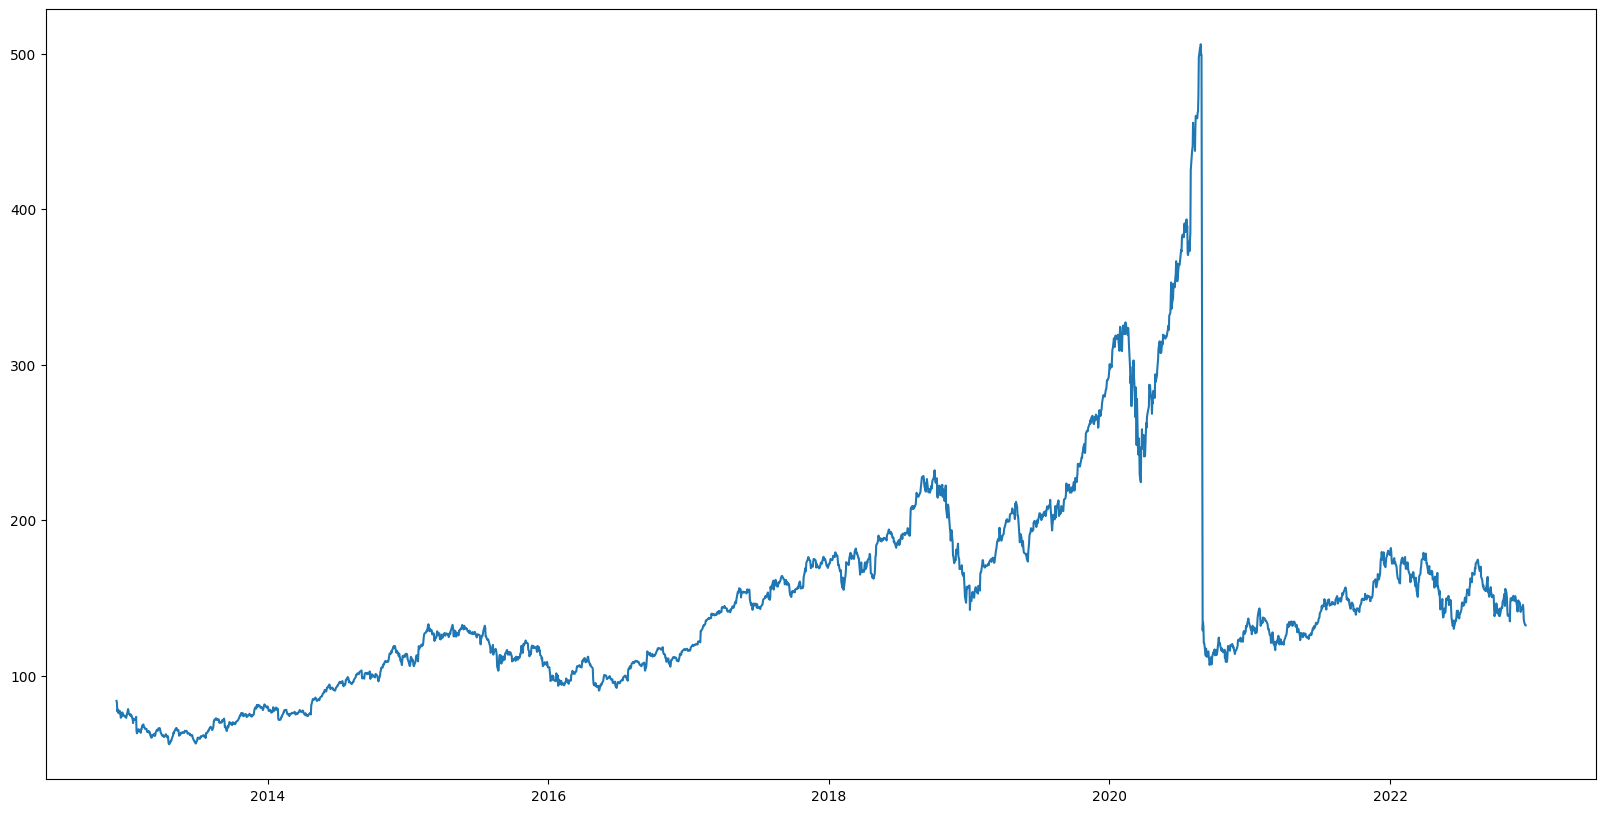

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df_apple);

In [23]:
for i in range(len(df_apple)):
    if df_apple.index[i] < pd.to_datetime('2020-08-31'):
        df_apple.iloc[i, 0] = df_apple.iloc[i, 0] / 4

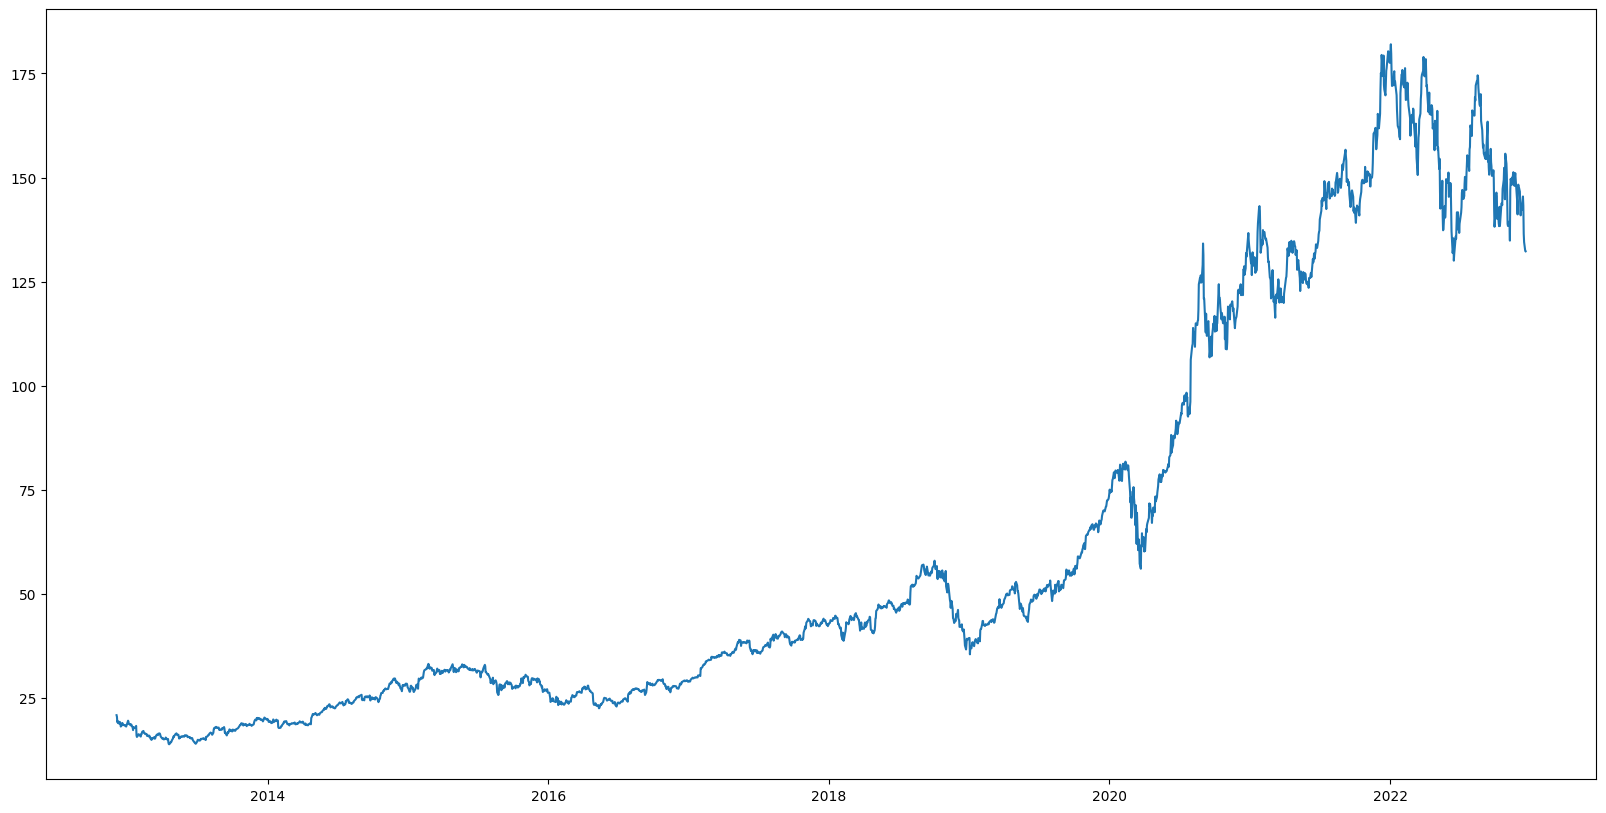

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(df_apple);

Это окончательный график курса акций компании Apple

График компании Google

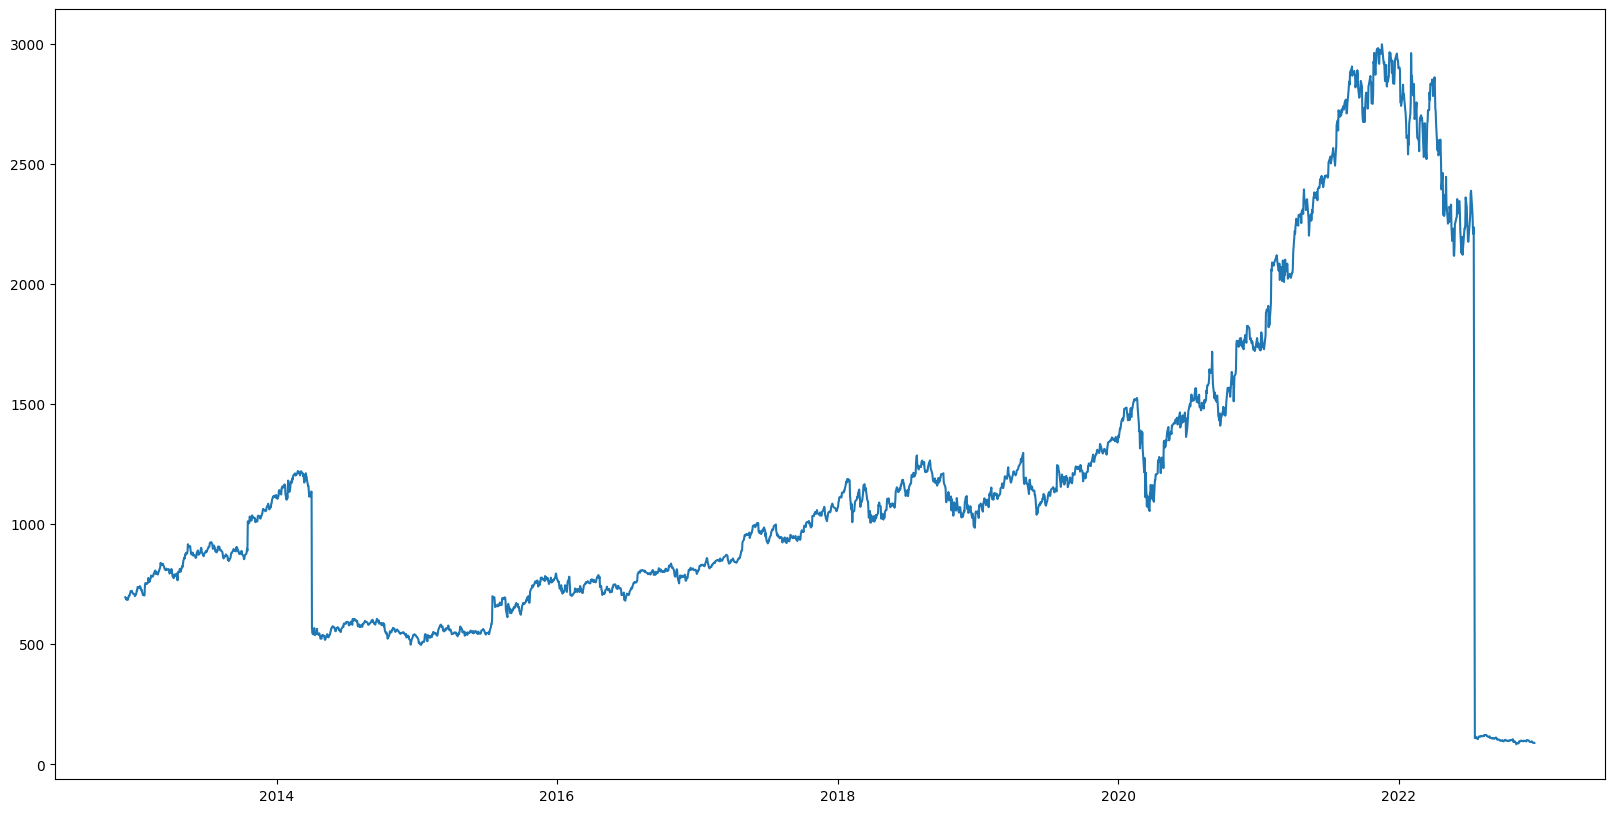

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(df_google);

Здесь мы такде видим два сплита, которые надо убрать

In [26]:
for i in range(len(df_google)):
    if df_google.index[i] < pd.to_datetime('2014-04-03'):
        df_google.iloc[i, 0] = df_google.iloc[i, 0] / 2

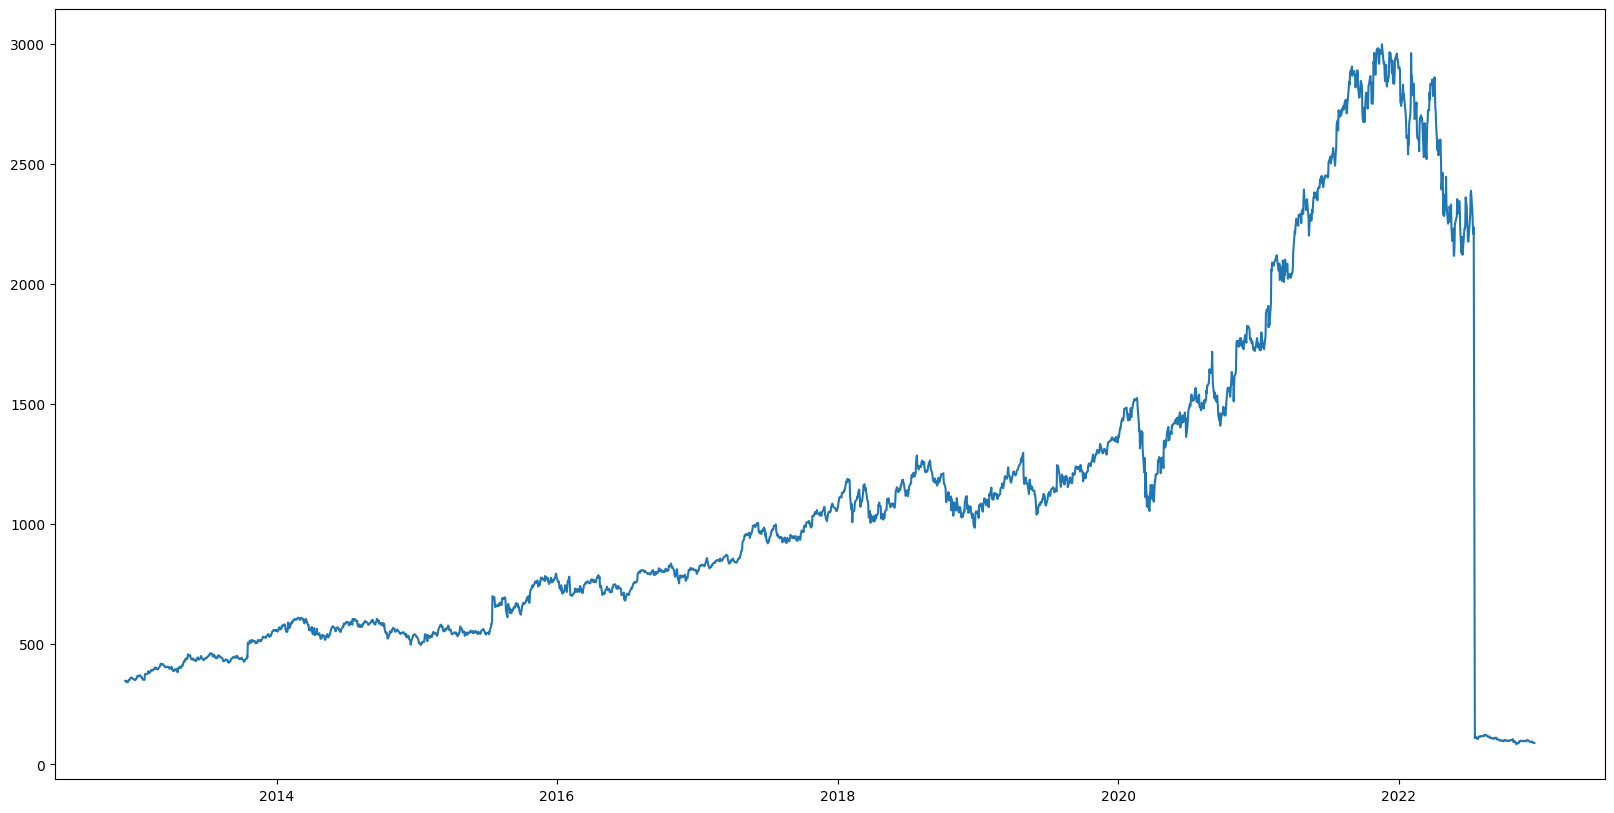

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(df_google);

In [28]:
for i in range(len(df_google)):
    if df_google.index[i] < pd.to_datetime('2022-07-18'):
        df_google.iloc[i, 0] = df_google.iloc[i, 0] / 20

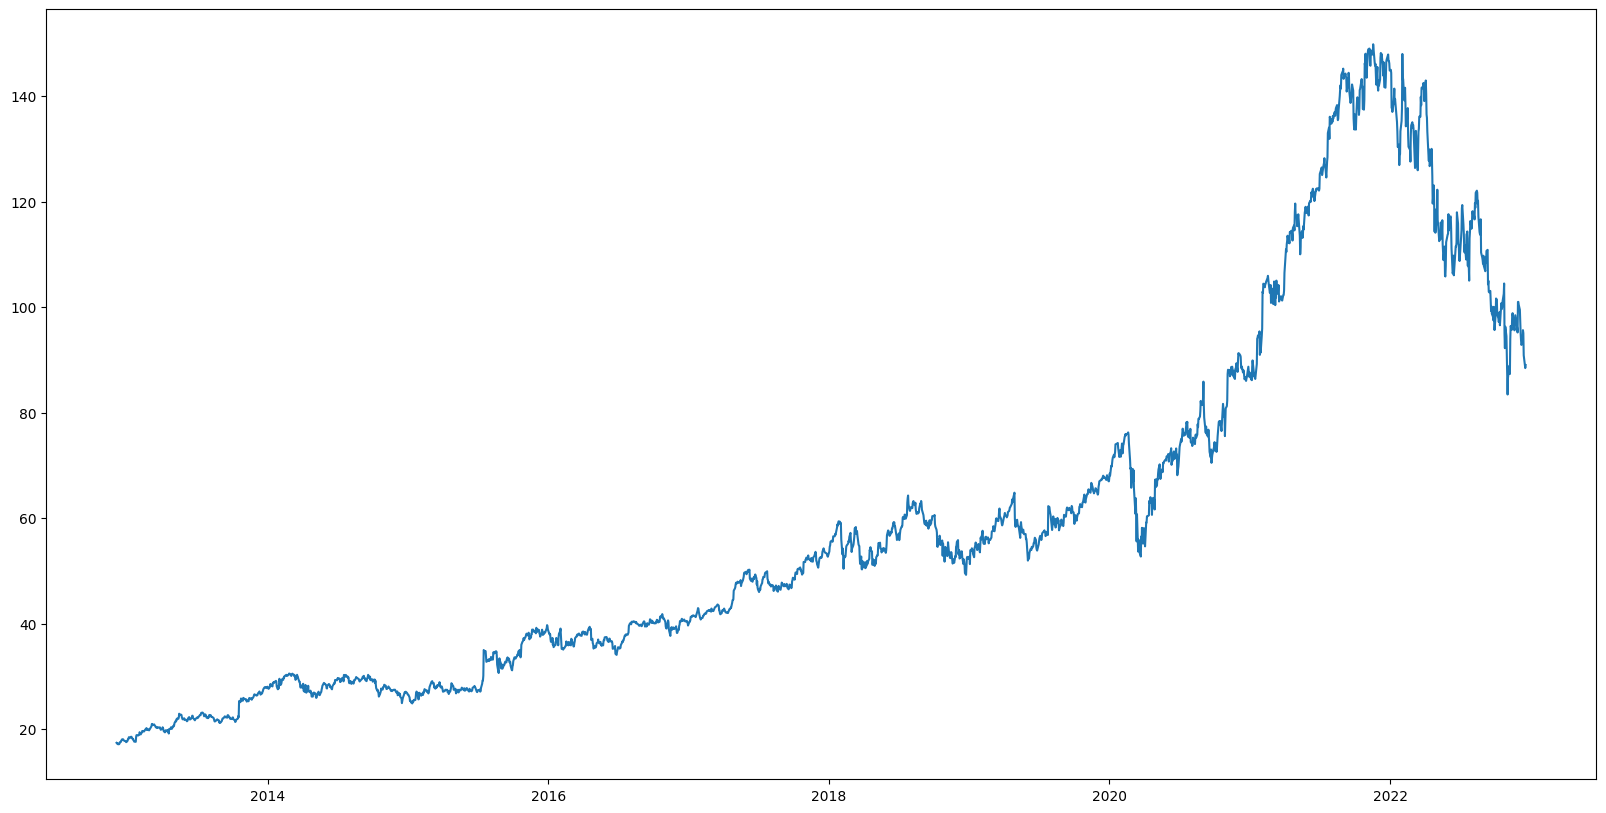

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(df_google);

Это окончательный график курса акций компании Google

График компании Facebook

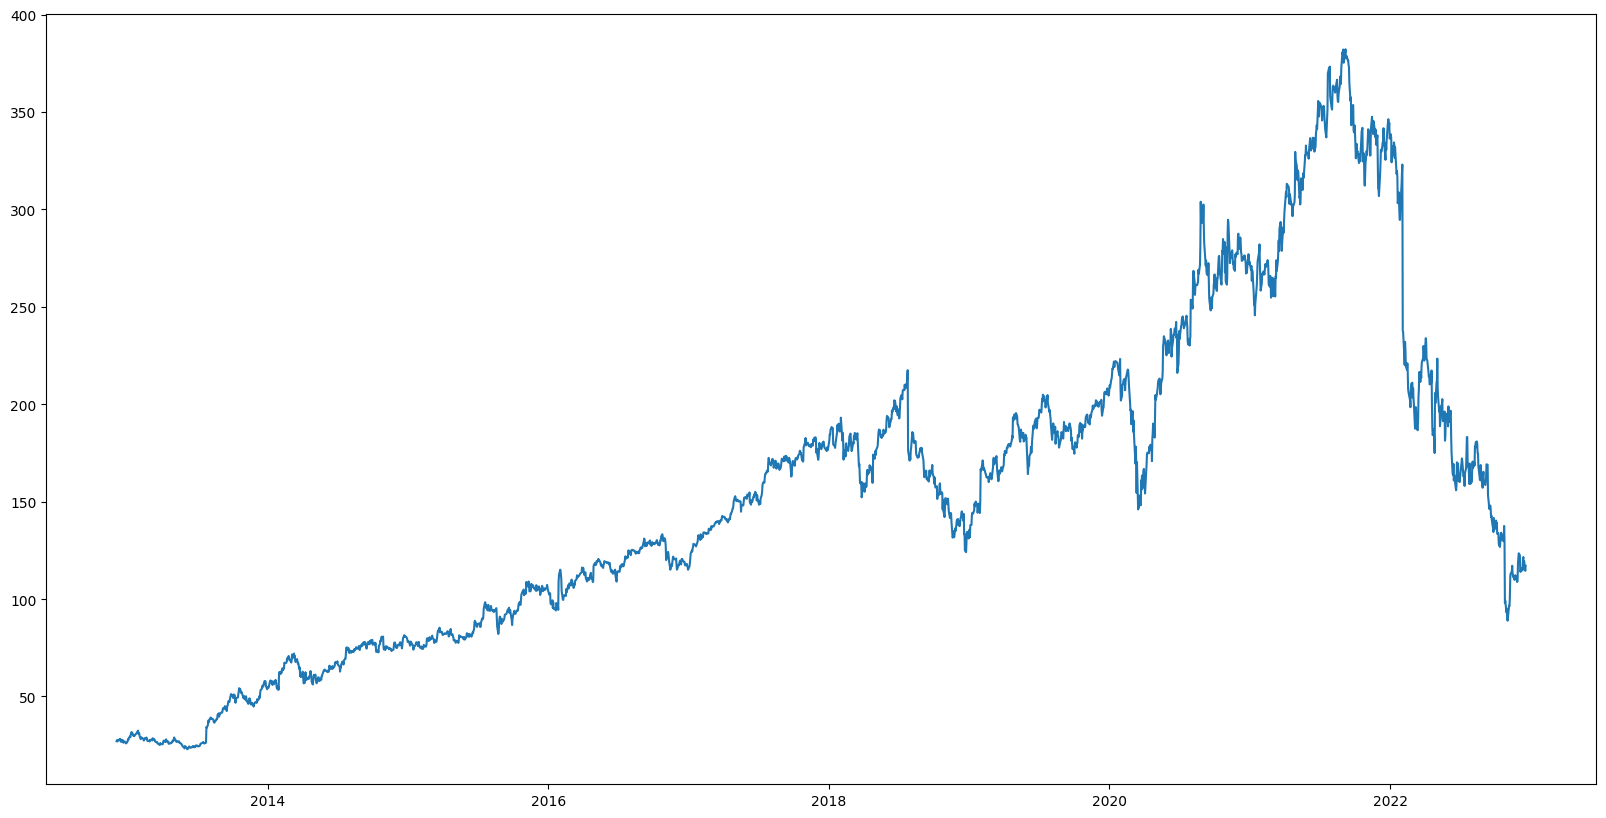

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(df_facebook);

Это окончательный график курса акций компании Facebook, т.к. она не делала сплитов

# Подсчет daily returns

## Apple

In [31]:
df_apple['dr'] = df_apple.diff().shift(-1)

In [32]:
df_apple.dr = df_apple.dr / df_apple.apple

In [33]:
df_apple

,apple,dr
2022-12-20,132.300003,0.000529
2022-12-19,132.369995,0.016167
2022-12-16,134.509995,0.014794
2022-12-15,136.500000,0.049158
2022-12-14,143.210007,0.015781
...,...,...
2012-12-07,19.044643,0.026244
2012-12-06,19.544447,-0.015445
2012-12-05,19.242582,0.068771
2012-12-04,20.565907,0.017964


Визуализируем результат

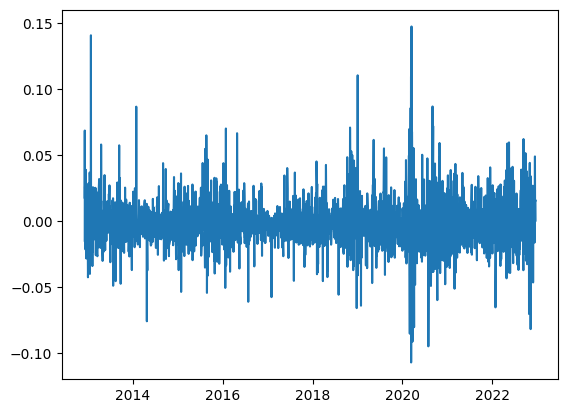

In [34]:
plt.plot(df_apple.dr);

График очень похож на белый шум, возможно, что значения имеют случайный характер

Посчитаем основные статистики

In [35]:
df_apple.dr.describe()

count    2530.000000
mean       -0.000559
std         0.018463
min        -0.106990
25%        -0.010235
50%        -0.000691
75%         0.007645
max         0.147640
Name: dr, dtype: float64

Посмотрим на распределение и сравним его с нормальным

In [36]:
norm_rnd_apple = np.random.normal(-0.000607, 0.018457, len(df_apple.dr)-1)

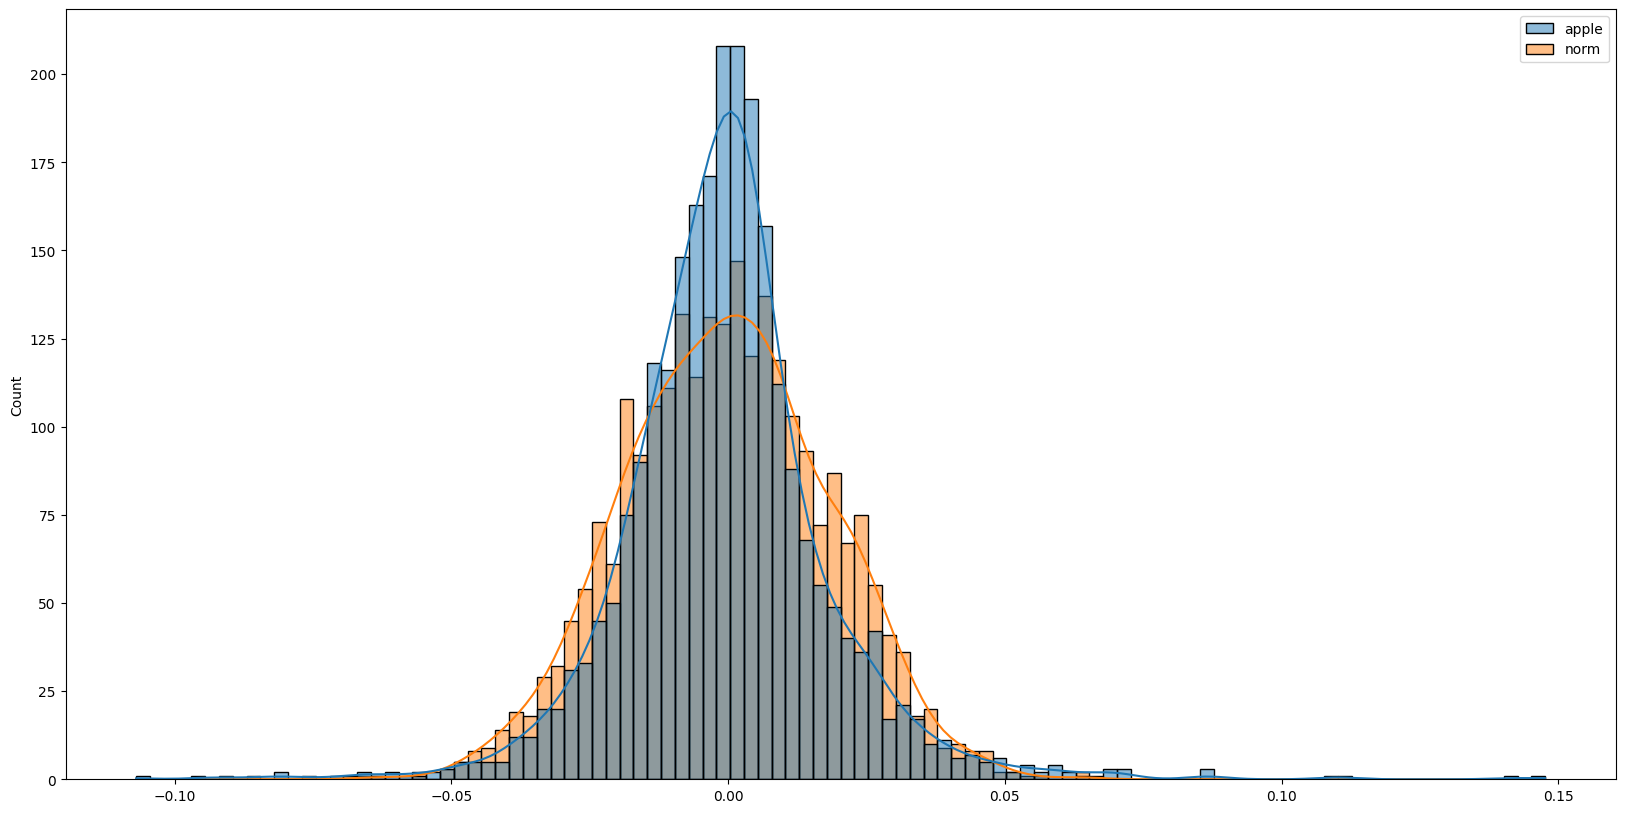

In [37]:
graf_apple = pd.DataFrame()
graf_apple['apple'] = df_apple.dr[:-1]
graf_apple['norm'] = norm_rnd_apple
plt.figure(figsize=(20, 10))
sns.histplot(data=graf_apple, kde=True);

Визуально распределения очень схожи

In [38]:
stat, p_value = ttest_ind(df_apple.dr[:-1], norm_rnd_apple)
print(p_value)

0.7498975972122656


In [39]:
stat, p_value = pearsonr(df_apple.dr[:-1], norm_rnd_apple)

In [40]:
p_value

0.28230700280839394

Критерии Стьюдента и Пирсона говорят, что распределение очень близко к нормальному

Проверим распределение на стационарность с помощью теста Дики-Фуллера

In [41]:
adf_test = adfuller(df_apple.dr[:-1])
print(adf_test[1])

6.345898058510171e-29


Тест Дики-Фулера опровергает нулевую гипотезу о нестационарности, значит распределение стационарно

## Google

In [42]:
df_google['dr'] = df_google.diff().shift(-1)
df_google.dr = df_google.dr / df_google.google
df_google

,google,dr
2022-12-20,89.019997,-0.006515
2022-12-19,88.440002,0.020579
2022-12-16,90.260002,0.006647
2022-12-15,90.860001,0.046335
2022-12-14,95.070000,0.005890
...,...,...
2012-12-07,17.105251,0.010114
2012-12-06,17.278250,-0.004789
2012-12-05,17.195499,0.004667
2012-12-04,17.275751,0.006107


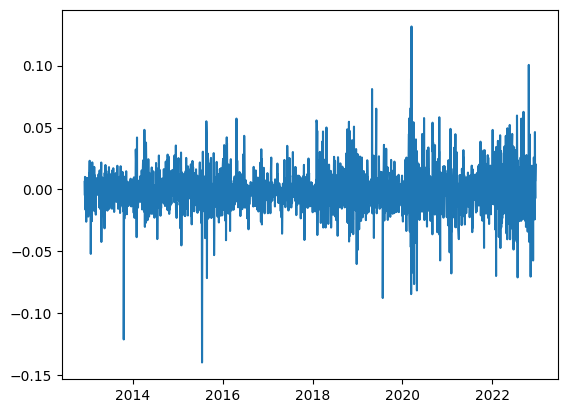

In [43]:
plt.plot(df_google.dr);

In [44]:
df_google.dr.describe()

count    2530.000000
mean       -0.000502
std         0.016917
min        -0.139847
25%        -0.008891
50%        -0.000783
75%         0.006871
max         0.131659
Name: dr, dtype: float64

In [45]:
norm_rnd_google = np.random.normal(-0.000553, 0.016899, len(df_google.dr)-1)

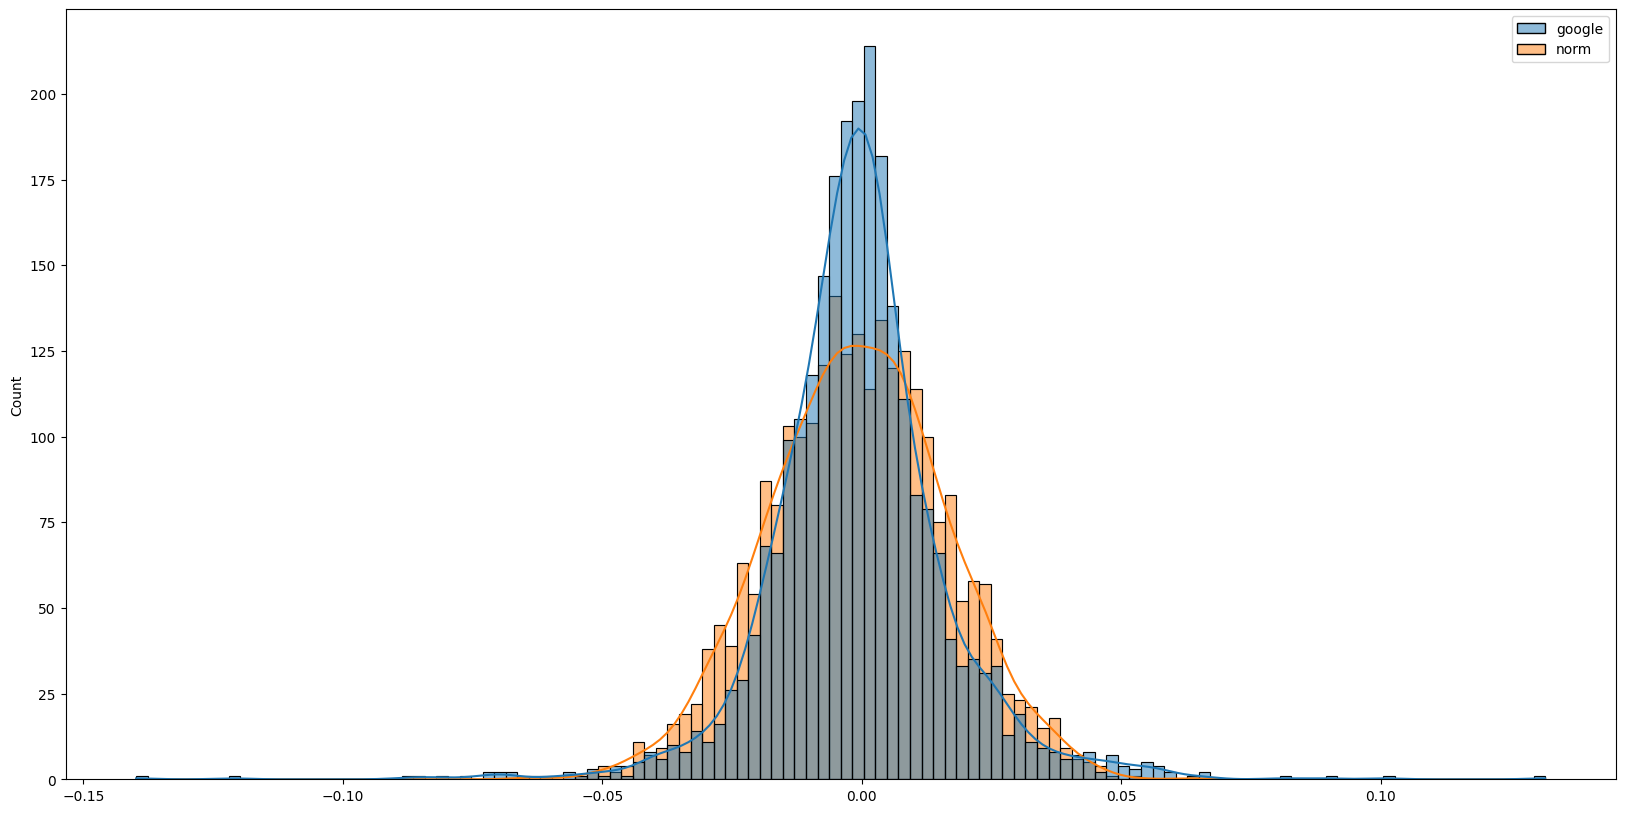

In [46]:
graf_google = pd.DataFrame()
graf_google['google'] = df_google.dr[:-1]
graf_google['norm'] = norm_rnd_google
plt.figure(figsize=(20, 10))
sns.histplot(data=graf_google, kde=True);

In [47]:
stat, p_value = ttest_ind(df_google.dr[:-1], norm_rnd_google)
print('Критерий Стьюдента', p_value)
stat, p_value = pearsonr(df_google.dr[:-1], norm_rnd_google)
print('Критерий Пирсона', p_value)

Критерий Стьюдента 0.6064767008262724
Критерий Пирсона 0.07955551128258344


In [48]:
adf_test = adfuller(df_google.dr[:-1])
print(adf_test[1])

1.0446260712108189e-20


Для компании Google мы получили аналогичные Apple результаты

## Facebook

In [49]:
df_facebook['dr'] = df_facebook.diff().shift(-1)
df_facebook.dr = df_facebook.dr / df_facebook.facebook
df_facebook

,facebook,dr
2022-12-20,117.089996,-0.022290
2022-12-19,114.480003,0.043239
2022-12-16,119.430000,-0.027464
2022-12-15,116.150002,0.046836
2022-12-14,121.589996,-0.011843
...,...,...
2012-12-07,27.485001,-0.018738
2012-12-06,26.969999,0.027438
2012-12-05,27.709999,-0.009022
2012-12-04,27.459999,-0.015295


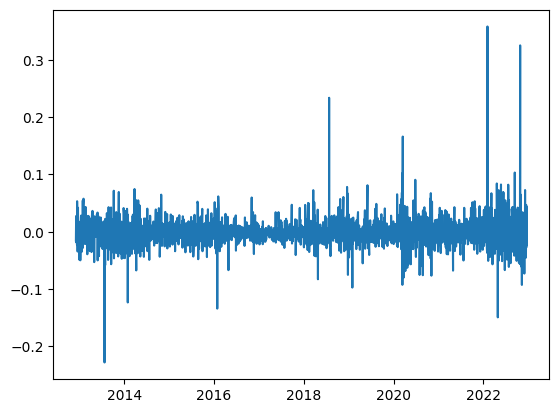

In [50]:
plt.plot(df_facebook.dr);

In [51]:
df_facebook.dr.describe()

count    2530.000000
mean       -0.000283
std         0.024653
min        -0.228441
25%        -0.012381
50%        -0.001050
75%         0.009778
max         0.358513
Name: dr, dtype: float64

In [52]:
norm_rnd_facebook = np.random.normal(-0.000308, 0.024606, len(df_facebook.dr)-1)

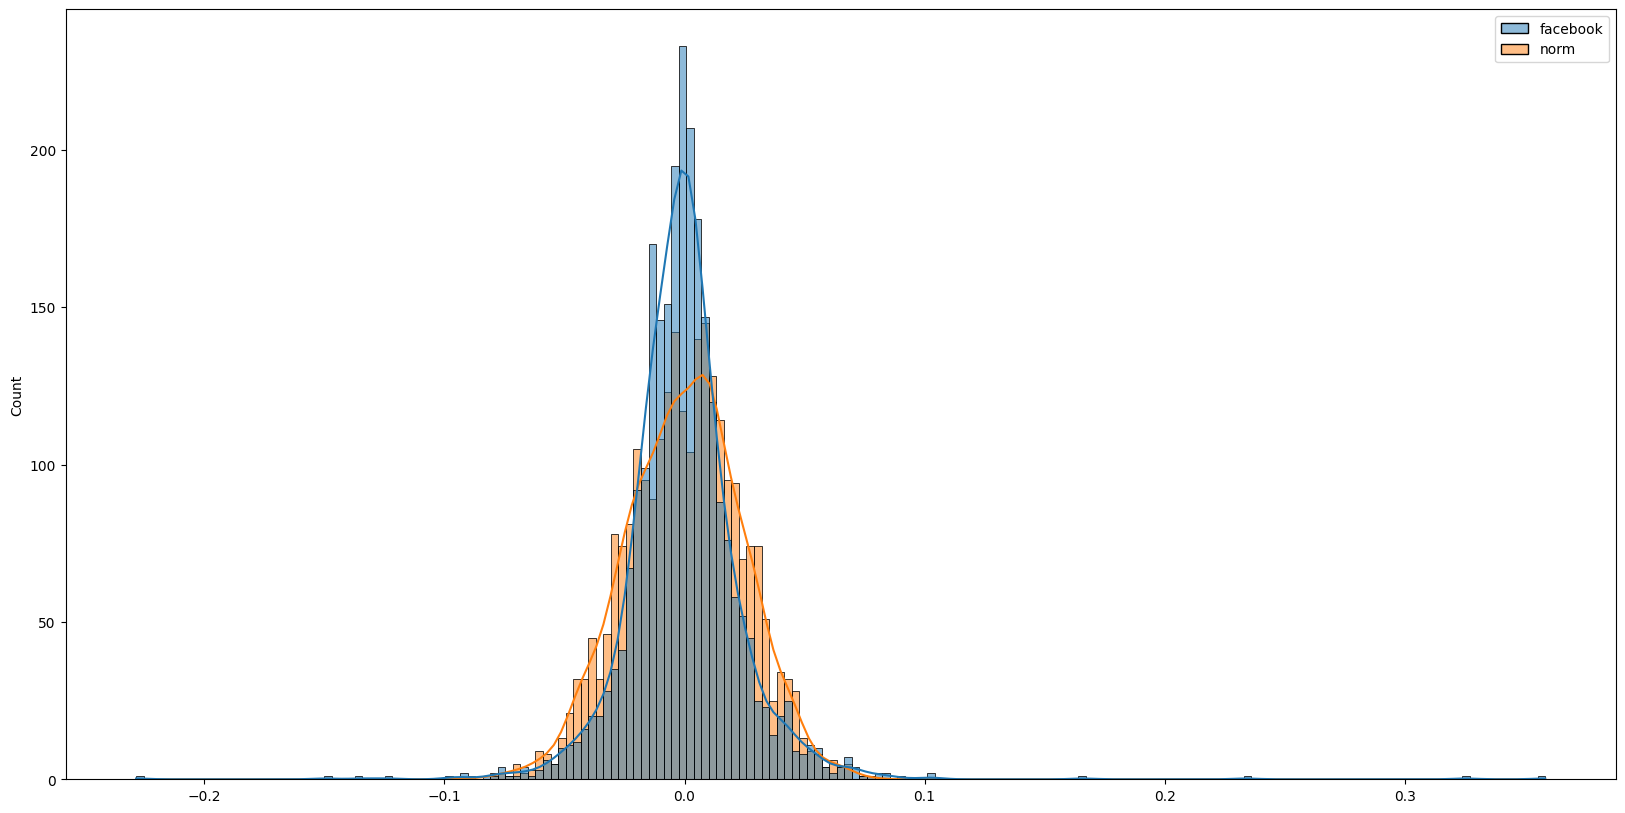

In [53]:
graf_facebook = pd.DataFrame()
graf_facebook['facebook'] = df_facebook.dr[:-1]
graf_facebook['norm'] = norm_rnd_facebook
plt.figure(figsize=(20, 10))
sns.histplot(data=graf_facebook, kde=True);

In [54]:
stat, p_value = ttest_ind(df_facebook.dr[:-1], norm_rnd_facebook)
print('Критерий Стьюдента', p_value)
stat, p_value = pearsonr(df_facebook.dr[:-1], norm_rnd_facebook)
print('Критерий Пирсона', p_value)

Критерий Стьюдента 0.723894138361587
Критерий Пирсона 0.26287693993866745


In [55]:
adf_test = adfuller(df_facebook.dr[:-1])
print(adf_test[1])

6.693051689317436e-30


Распределение для компании Facebook менее нормально, но также стационарно

Это все говорит нам, что изменения курсов акций этих компаний случайные величины и не имеют взаимосвязи между прошлыми и будущими значениями

<AxesSubplot: >

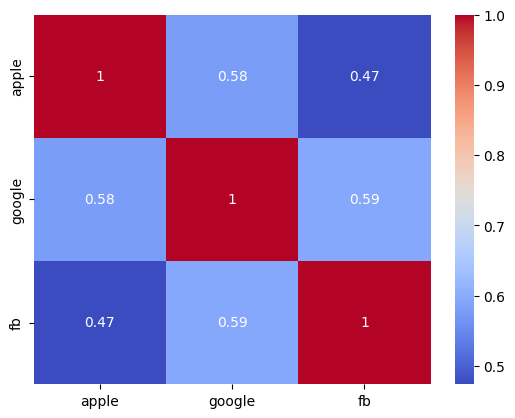

In [56]:
df_comp = pd.DataFrame()
df_comp['apple'] = df_apple.dr
df_comp['google'] = df_google.dr
df_comp['fb'] = df_facebook.dr
sns.heatmap(df_comp.corr(), cmap='coolwarm', annot=True)

Return-ы компаний неплохо скоррелированы, что говорит нам о том, что курсы компаний изменяются примерно одинаково, и на изменение их курсов влияют те же самые факторы

## Profit-and-loss

In [57]:
f1 = np.random.normal()
f2 = np.random.normal()
f3 = np.random.normal()

In [58]:
df1 = pd.DataFrame()
df1['pnli'] = df_apple.dr * f1
df1['pnl'] = df1.pnli.cumsum()

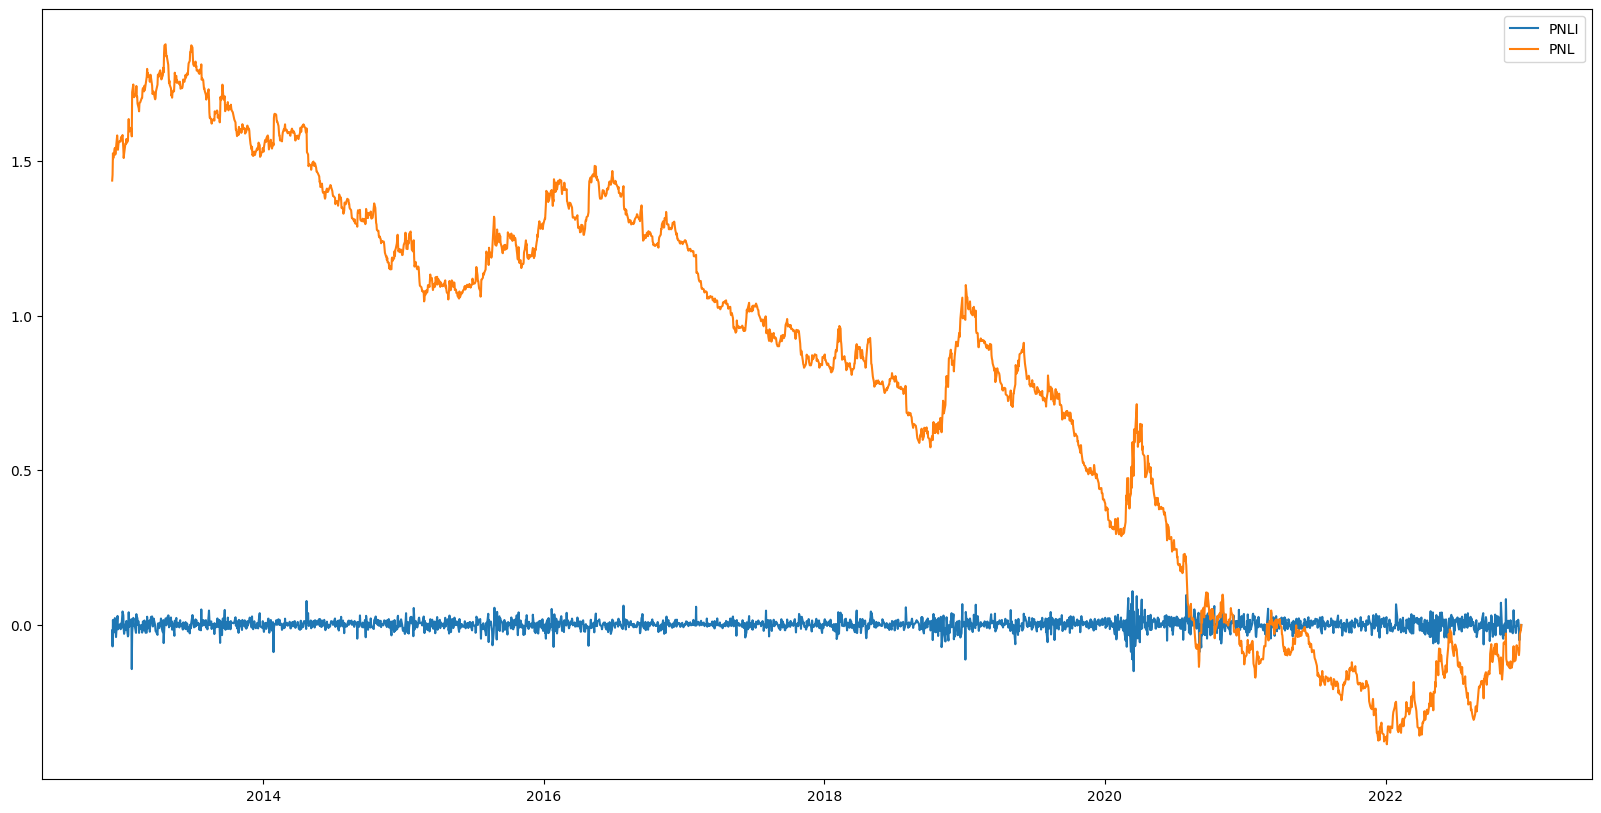

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(df1.pnli, label='PNLI');
plt.plot(df1.pnl, label='PNL');
plt.legend();

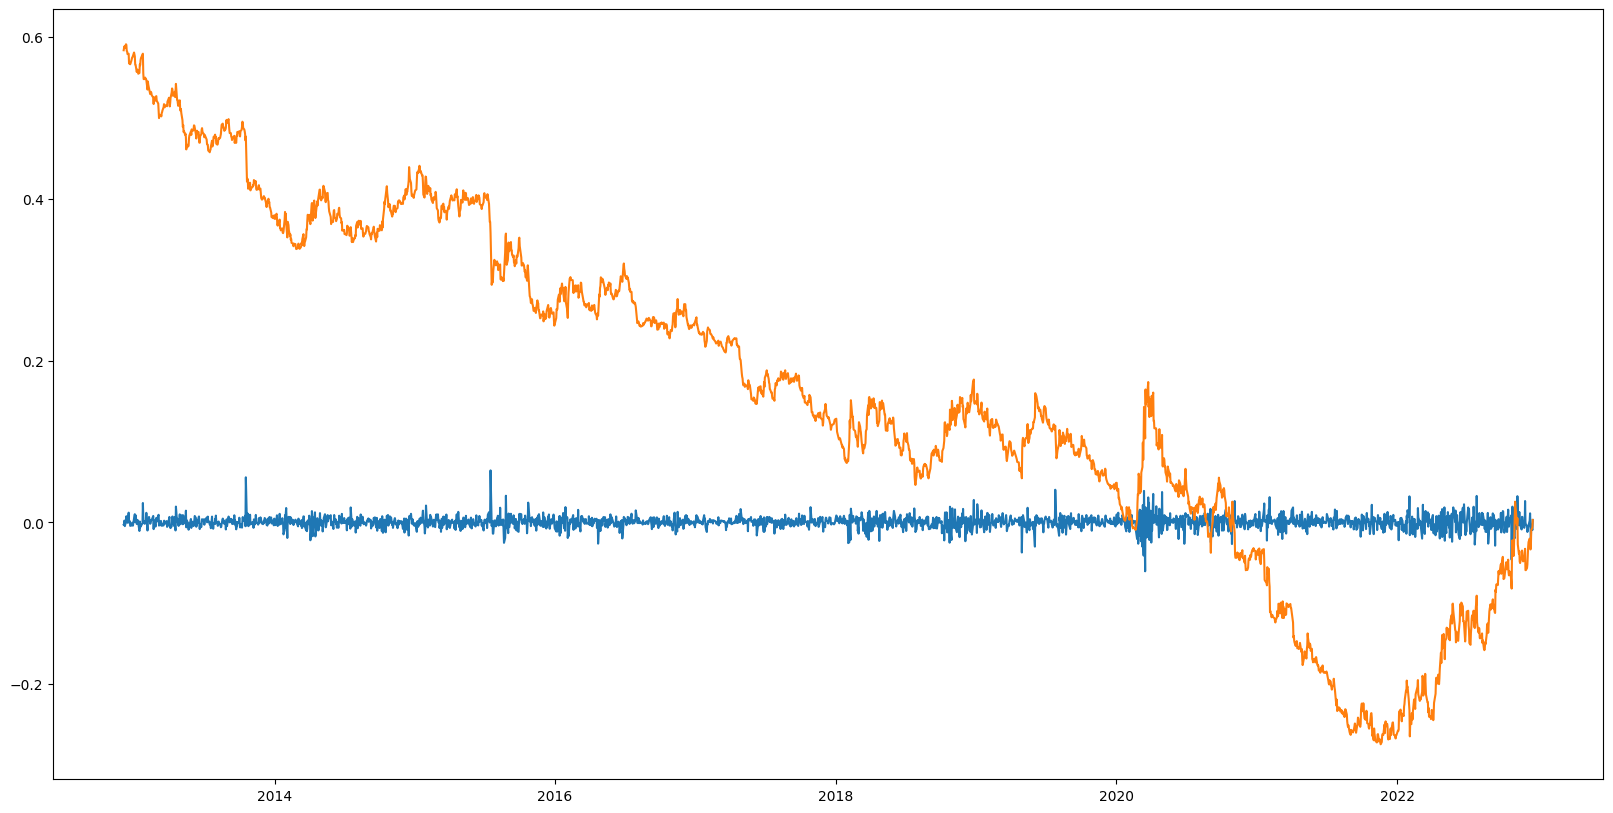

In [60]:
df2 = pd.DataFrame()
df2['pnli'] = df_google.dr * f2
df2['pnl'] = df2.pnli.cumsum()
plt.figure(figsize=(20, 10))
plt.plot(df2.pnli, label='PNLI');
plt.plot(df2.pnl, label='PNL');

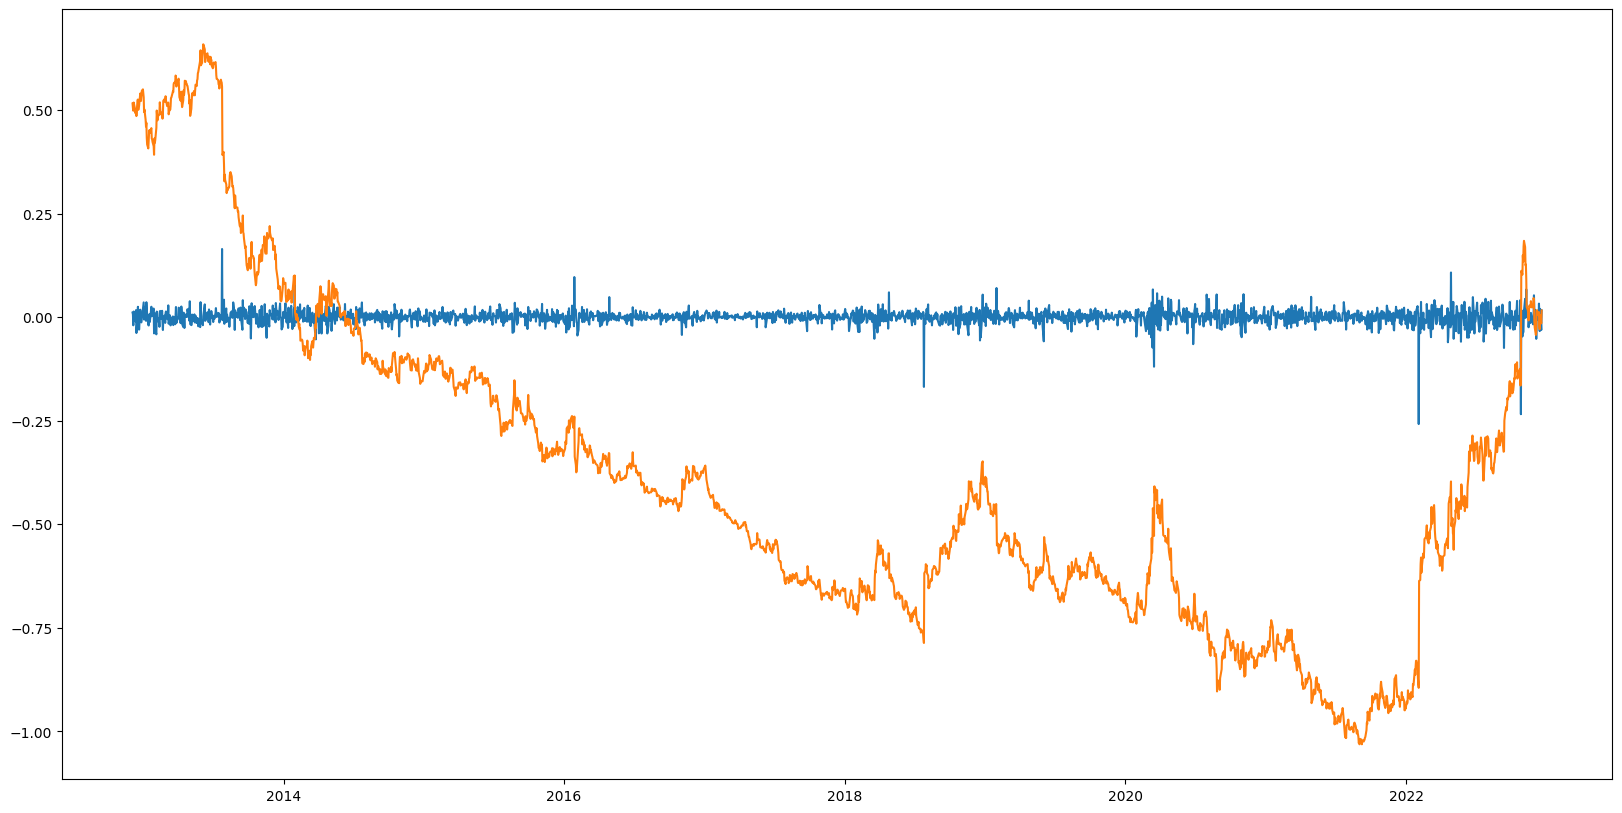

In [61]:
df3 = pd.DataFrame()
df3['pnli'] = df_facebook.dr * f3
df3['pnl'] = df3.pnli.cumsum()
plt.figure(figsize=(20, 10))
plt.plot(df3.pnli, label='PNLI');
plt.plot(df3.pnl, label='PNL');

# Классификация

загрузим данные из файла

In [149]:
df = pd.read_csv('g:\SkillFactory\Тестовое АльфаБанк\\xtask.csv')

In [2]:
df = pd.read_csv('e:\Олег\Тестовое АльфаБанк\\xtask.csv')

In [3]:
display(df)

,a,b,c,d,class
0,-0.233408,-0.845698,0.365256,0.311292,1.0
1,0.073524,-0.747284,0.586381,0.303840,1.0
2,0.105561,-0.749805,0.149815,0.635771,1.0
3,-0.642419,-0.342424,-0.608454,0.229135,0.0
4,0.296581,-0.656553,0.022429,0.639708,0.0
...,...,...,...,...,...
3834,-0.926398,0.171996,-0.333049,0.035802,NaN
3835,0.787500,-0.355948,0.425932,-0.200971,NaN
3836,0.282760,-0.569896,-0.231674,0.735929,NaN
3837,-0.599582,-0.749842,0.265262,-0.088739,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3839 non-null   float64
 1   b       3839 non-null   float64
 2   c       3839 non-null   float64
 3   d       3839 non-null   float64
 4   class   3071 non-null   float64
dtypes: float64(5)
memory usage: 150.1 KB


разделим данные на тренировочные и тестовые

In [5]:
df_train = df[:3071]
df_test = df[3071:]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3071 non-null   float64
 1   b       3071 non-null   float64
 2   c       3071 non-null   float64
 3   d       3071 non-null   float64
 4   class   3071 non-null   float64
dtypes: float64(5)
memory usage: 120.1 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 3071 to 3838
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       768 non-null    float64
 1   b       768 non-null    float64
 2   c       768 non-null    float64
 3   d       768 non-null    float64
 4   class   0 non-null      float64
dtypes: float64(5)
memory usage: 30.1 KB


In [8]:
print('1:',len(df_train[df_train['class']==1]))
print('0:',len(df_train[df_train['class']==0]))
print(len(df_train[df_train['class']==0]) / len(df_train))

1: 2026
0: 1045
0.3402800390752198


выведем основные метрики

In [9]:
df_train.describe()

,a,b,c,d,class
count,3071.000000,3071.000000,3071.000000,3071.000000,3071.00000
mean,-0.002720,-0.000529,-0.004356,0.011408,0.65972
std,0.492057,0.493647,0.487877,0.505907,0.47388
min,-0.995371,-0.991212,-0.994118,-0.990012,0.00000
25%,-0.399741,-0.404161,-0.398240,-0.389400,0.00000
50%,-0.010718,-0.008298,-0.015014,0.001528,1.00000
75%,0.398228,0.402412,0.381475,0.435223,1.00000
max,0.995987,0.993865,0.983458,0.997183,1.00000


данные имеют разные средние и примерно равные дисперсии

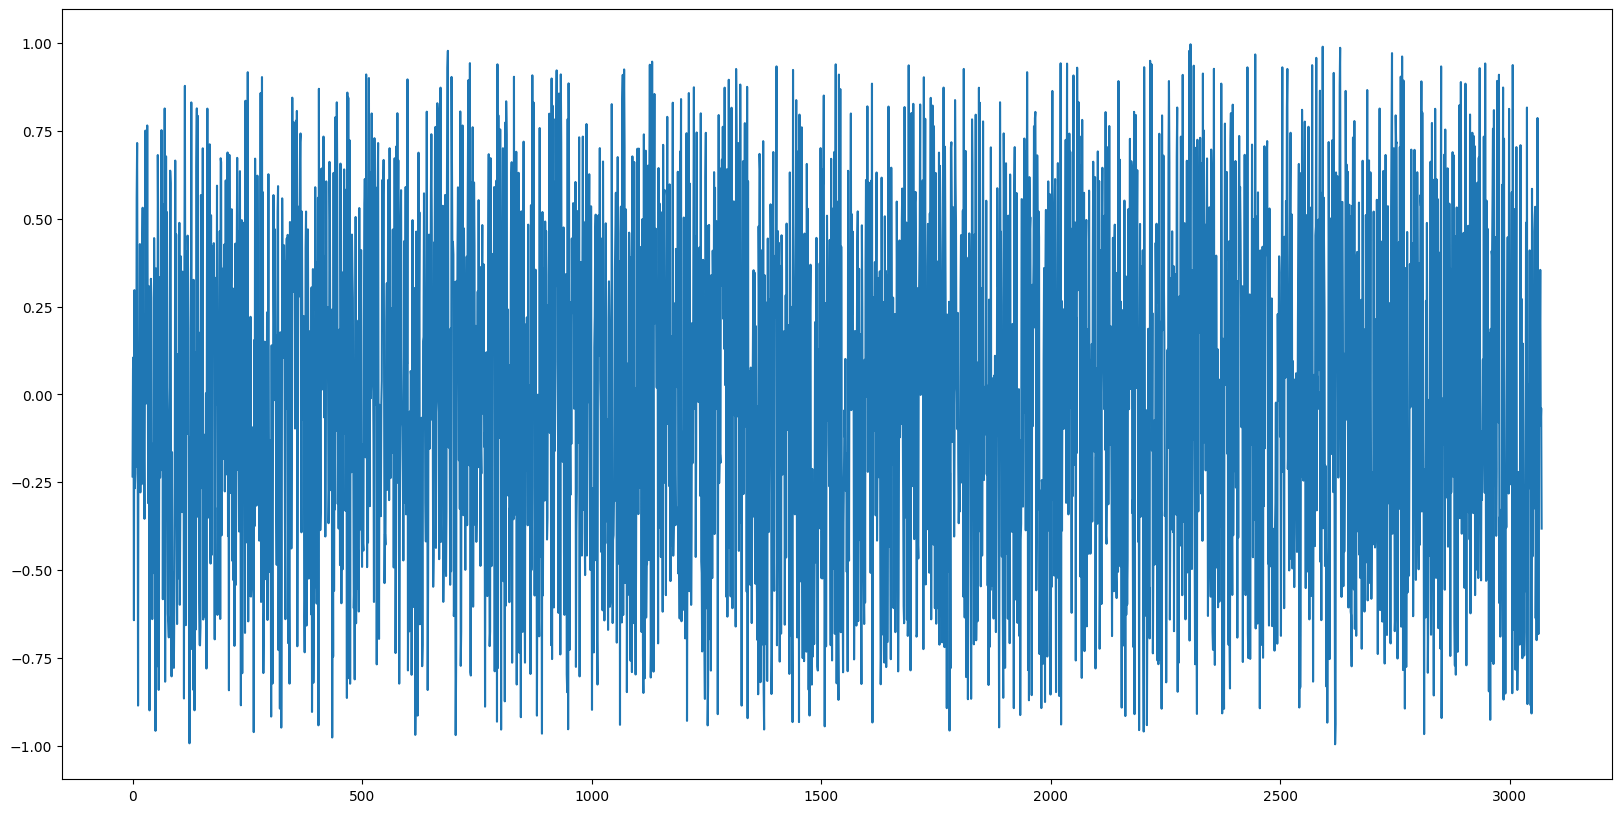

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(df_train.a);

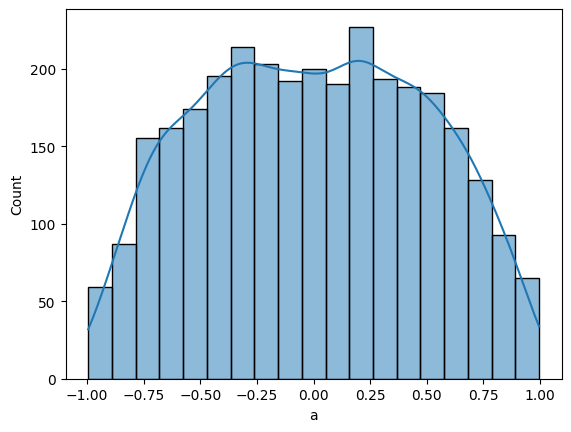

In [11]:
sns.histplot(data=df_train.a, kde=True);

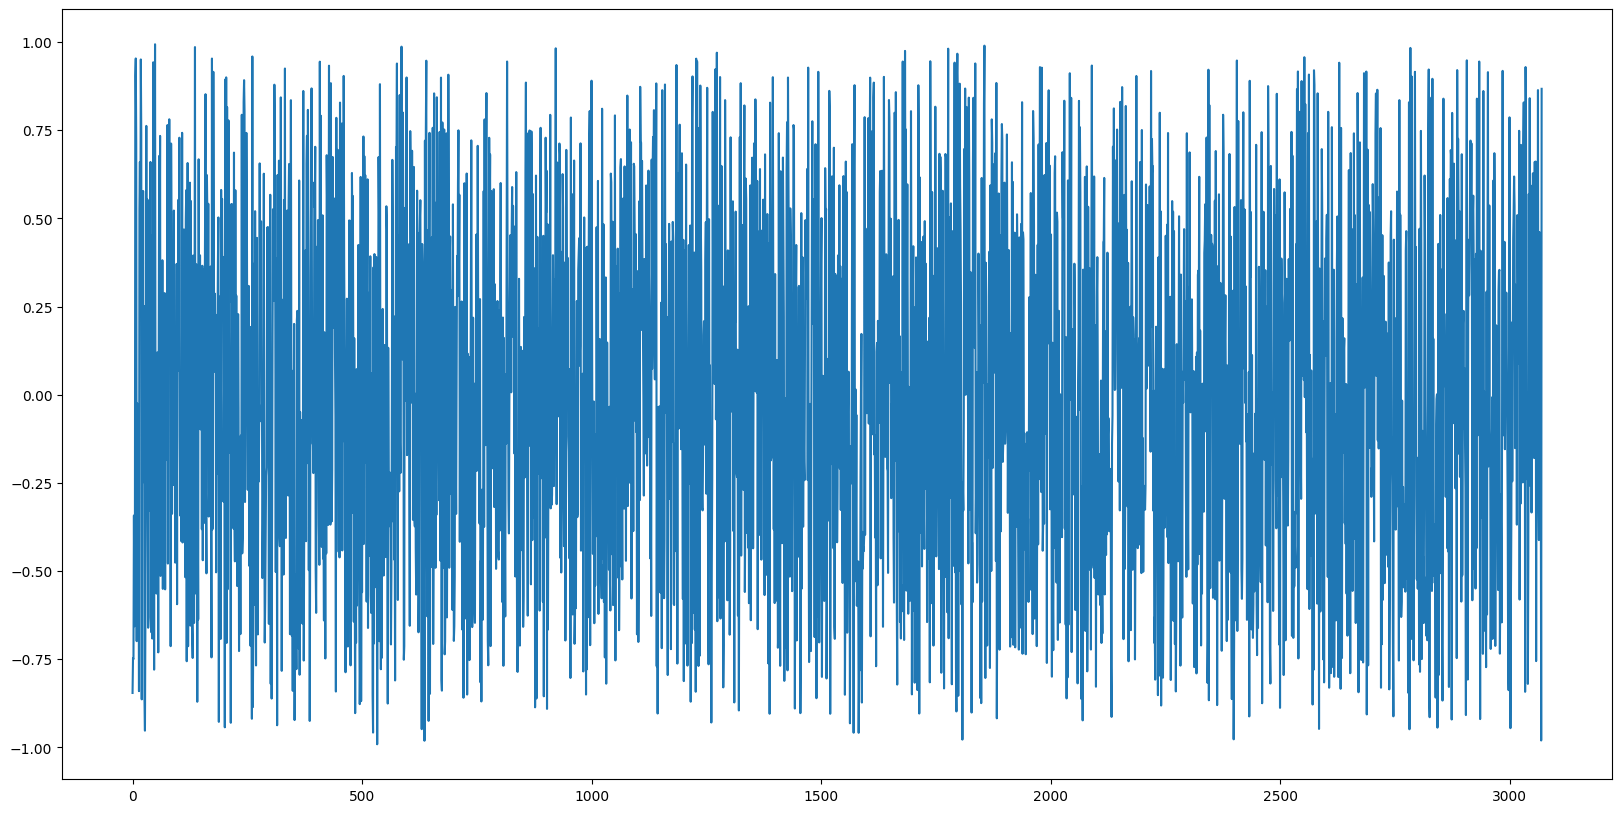

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df_train.b);

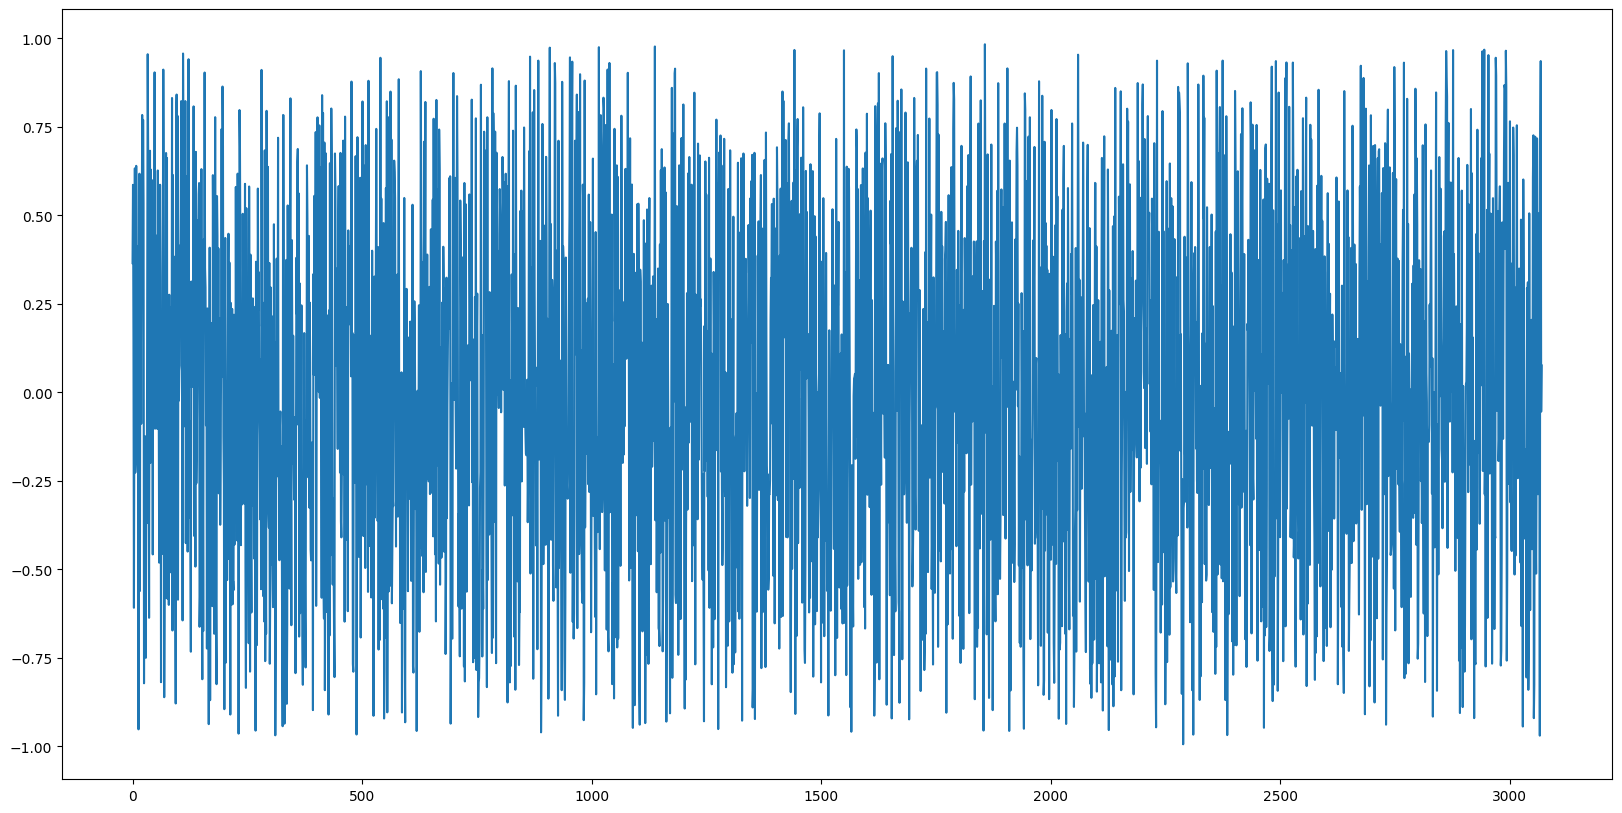

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(df_train.c);

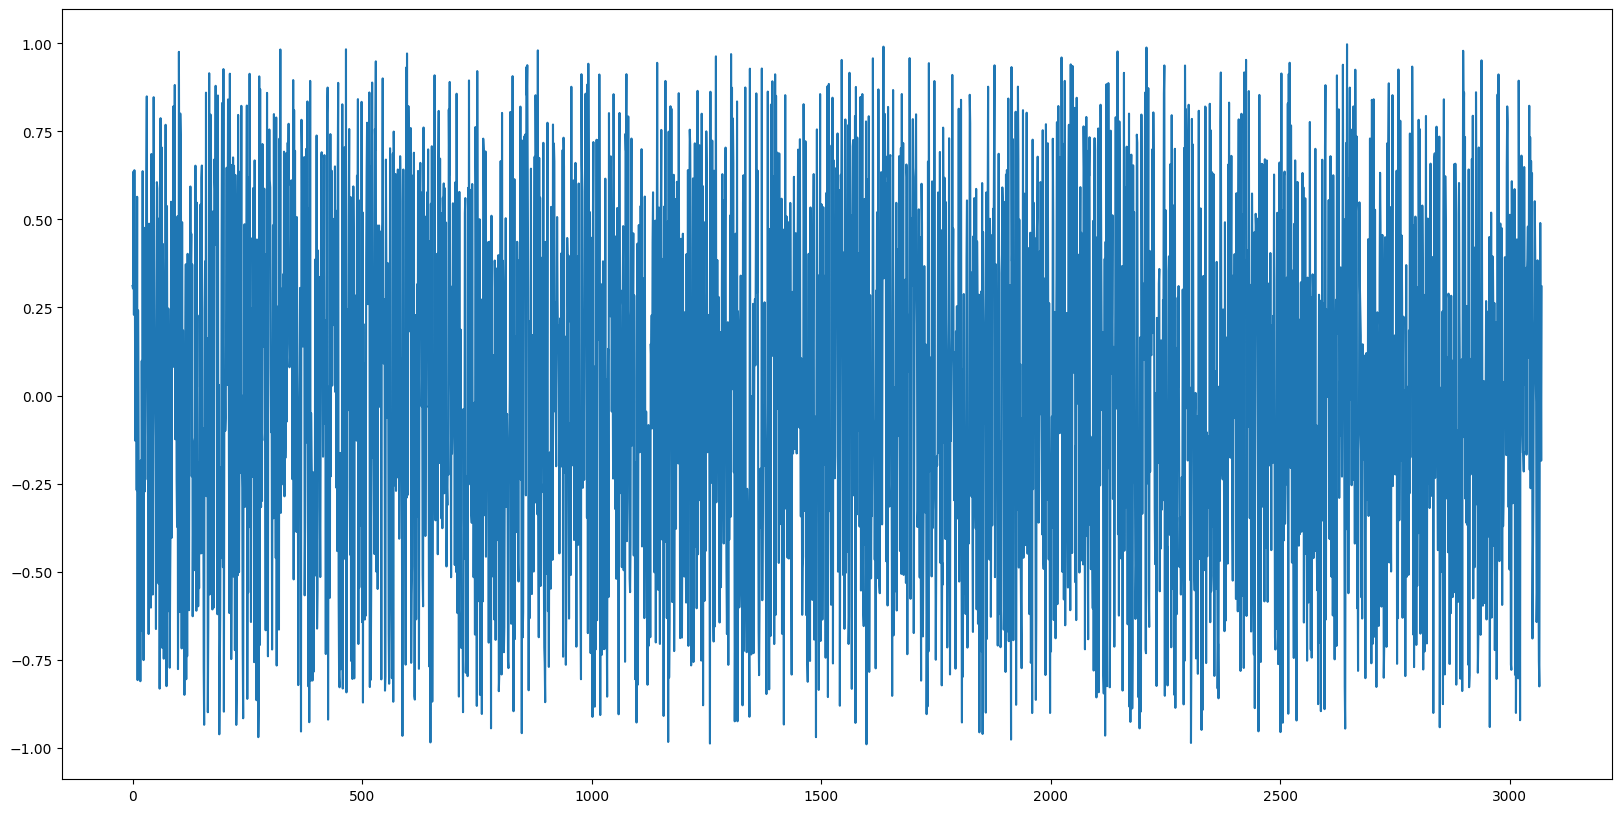

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df_train.d);

данные очень похожи на белый шум и приближены к гауссу

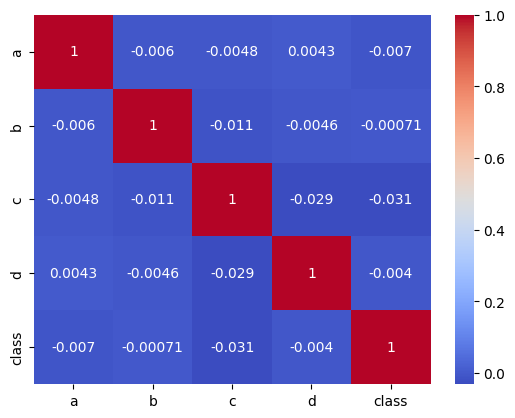

In [15]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm');

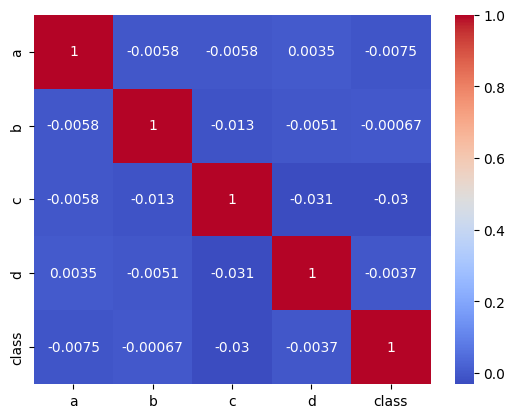

In [16]:
sns.heatmap(df_train.corr(method='spearman'), annot=True, cmap='coolwarm');

данные между собой не скоррелированы

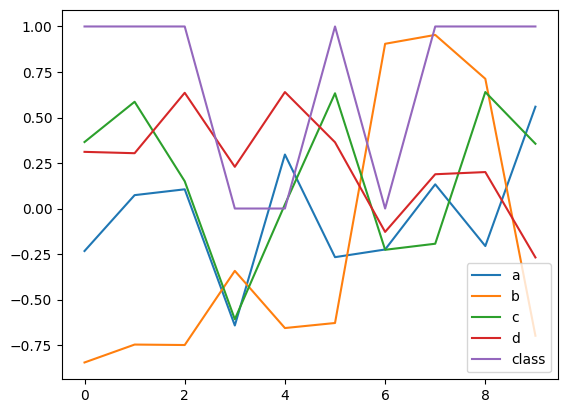

In [17]:
plt.plot(df_train.a[:10], label='a');
plt.plot(df_train.b[:10], label='b');
plt.plot(df_train.c[:10], label='c');
plt.plot(df_train.d[:10], label='d');
plt.plot(df_train['class'][:10], label='class');
plt.legend();

построим бейзлайн-модель

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

In [19]:
clf = SVC(random_state=42)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['a', 'b', 'c', 'd']], df_train['class'],test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_pred, y_test)
print(f1)

0.8009506833036245


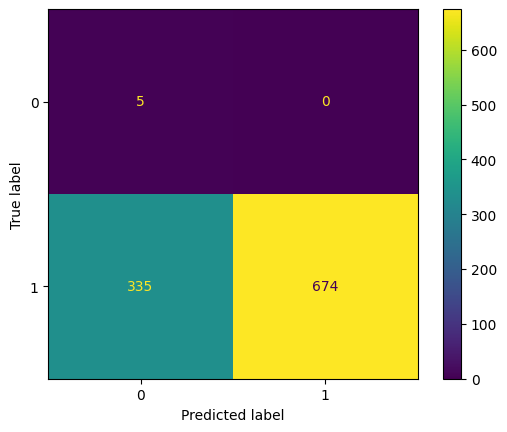

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test))
disp.plot()

модель предсказывает одни единицы, посмотрим на распределение данных

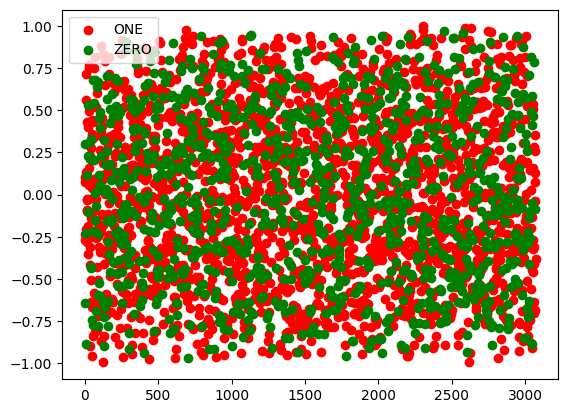

In [22]:
plt.scatter(df_train[df_train['class']==1].index, df_train[df_train['class']==1].a, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].index, df_train[df_train['class']==0].a, color='green', label='ZERO');
plt.legend();

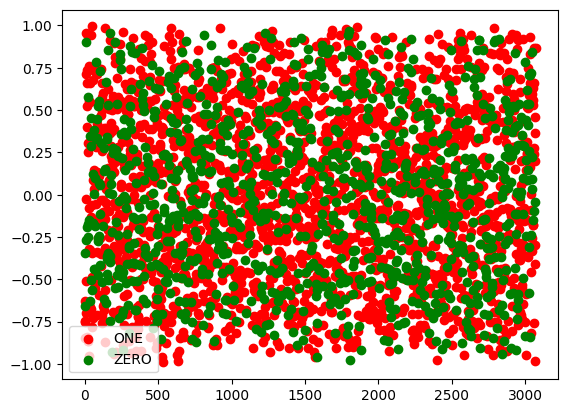

In [23]:
plt.scatter(df_train[df_train['class']==1].index, df_train[df_train['class']==1].b, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].index, df_train[df_train['class']==0].b, color='green', label='ZERO');
plt.legend();

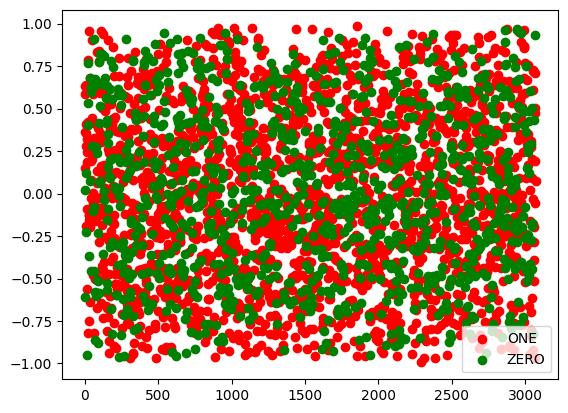

In [24]:
plt.scatter(df_train[df_train['class']==1].index, df_train[df_train['class']==1].c, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].index, df_train[df_train['class']==0].c, color='green', label='ZERO');
plt.legend();

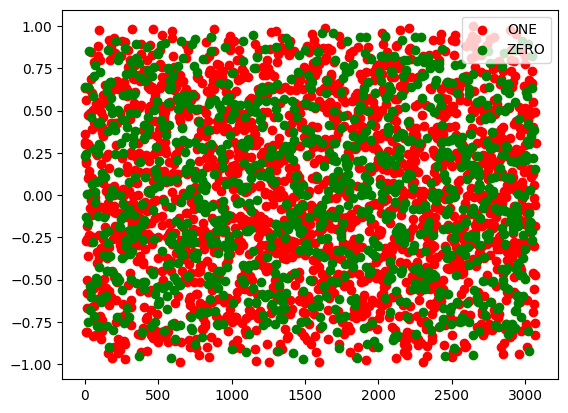

In [25]:
plt.scatter(df_train[df_train['class']==1].index, df_train[df_train['class']==1].d, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].index, df_train[df_train['class']==0].d, color='green', label='ZERO');
plt.legend();

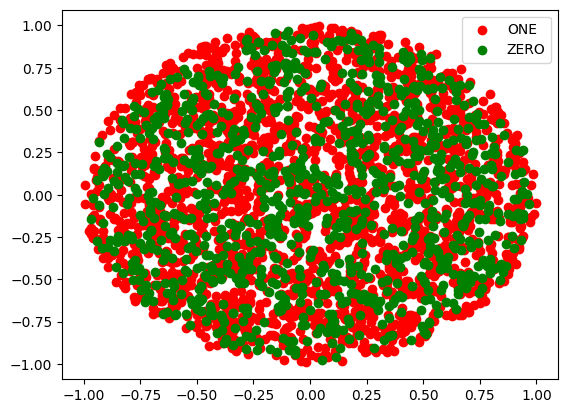

In [26]:
plt.scatter(df_train[df_train['class']==1].a, df_train[df_train['class']==1].b, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].a, df_train[df_train['class']==0].b, color='green', label='ZERO');
plt.legend();

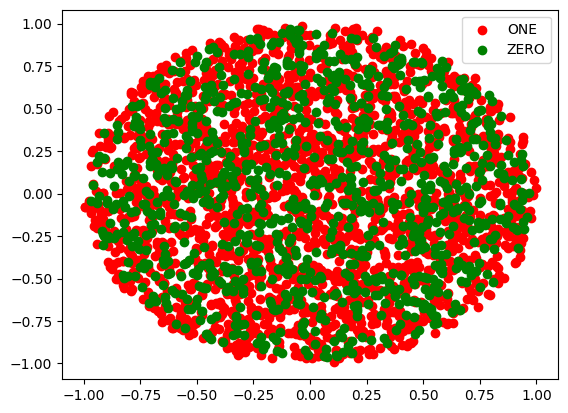

In [27]:
plt.scatter(df_train[df_train['class']==1].a, df_train[df_train['class']==1].c, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].a, df_train[df_train['class']==0].c, color='green', label='ZERO');
plt.legend();

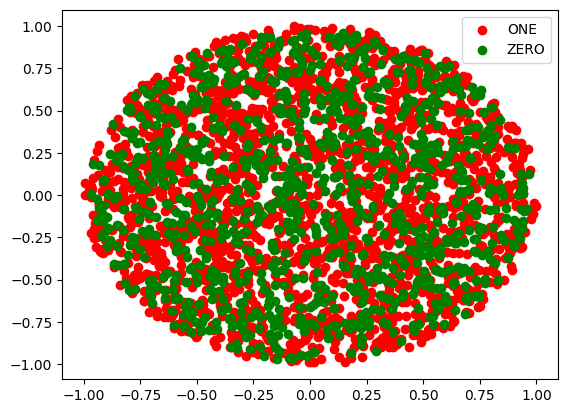

In [28]:
plt.scatter(df_train[df_train['class']==1].a, df_train[df_train['class']==1].d, color='red', label='ONE');
plt.scatter(df_train[df_train['class']==0].a, df_train[df_train['class']==0].d, color='green', label='ZERO');
plt.legend();

видно, что классы плохо разделимы линейно

SVM хороший метод для плохо разделимых данных, попробуем подобрать гиперпараметры для него

In [29]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(clf, param_grid, refit=True, verbose=2, cv=cv)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 30 folds for each of 48 candidates, totalling 1440 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamm

In [30]:
y_pred = grid.predict(X_test)
f1 = f1_score(y_pred, y_test)
print(f1)

1.0


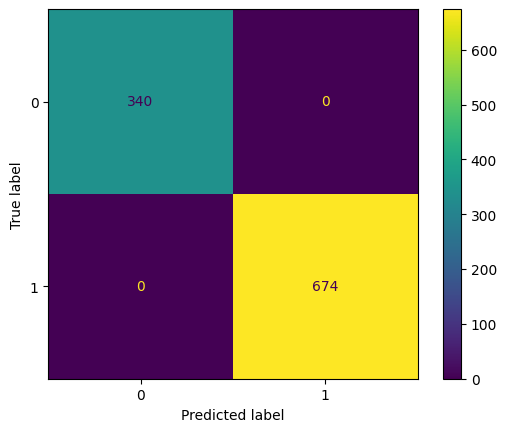

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test))
disp.plot()

как видим, нам удалось настроить модель SVM

сохраним нашу модель

In [32]:
import joblib

In [33]:
joblib.dump(grid, 'model.pkl')

['model.pkl']

сделаем предсказание для неразмеченного набора данных

In [34]:
y = grid.predict(df_test[['a', 'b', 'c', 'd']])

сохраним результаты

In [46]:
df_y = pd.Series(y)
df_y.to_csv('Y_test.csv', index=False, header=False)